Capstone 1 Data Wrangling 
Data Headers

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005
PAY_2: Repayment status in August, 2005
PAY_3: Repayment status in July, 2005 
PAY_4: Repayment status in June, 2005 
PAY_5: Repayment status in May, 2005 
PAY_6: Repayment status in April, 2005 
BILL_AMT1: Amount of bill statement in September, 2005
BILL_AMT2: Amount of bill statement in August, 2005
BILL_AMT3: Amount of bill statement in July, 2005
BILL_AMT4: Amount of bill statement in June, 2005
BILL_AMT5: Amount of bill statement in May, 2005
BILL_AMT6: Amount of bill statement in April, 2005
PAY_AMT1: Amount of previous payment in September, 2005
PAY_AMT2: Amount of previous payment in August, 2005
PAY_AMT3: Amount of previous payment in July, 2005
PAY_AMT4: Amount of previous payment in June, 2005
PAY_AMT5: Amount of previous payment in May, 2005
PAY_AMT6: Amount of previous payment in April, 2005
default payment next month: Default payment (1=yes, 0=no)

Business Questions: What is causing customers to default? What actions can be taken to mitigate the amount of defaults?

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Import File
filename = r'C:\Users\jharp\OneDrive\Desktop\Springboard Career\Capstone #1\default of credit card clients.xls'
df = pd.read_excel(filename, header=1)
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.index = df['ID']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.drop("ID", axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#Check for missing data
#No missing data

df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
df = df.rename(columns={'default payment next month': 'default_payment_next_month', 
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

Exploratory Data Analysis

In [11]:
# Number of defaults
df.groupby('default_payment_next_month')['default_payment_next_month'].count()

default_payment_next_month
0    23364
1     6636
Name: default_payment_next_month, dtype: int64

Data Question: 22% of loans that have been given out have defaulted. The main question of this analysis is to answer 1. What is causing these defaults? 2. Can we develop new lending policies to decrease the rate of defaults?

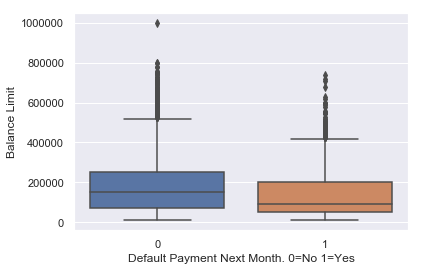

In [12]:
_ = sns.boxplot(x='default_payment_next_month', y='LIMIT_BAL', data=df)
_ = plt.xlabel('Default Payment Next Month. 0=No 1=Yes')
_ = plt.ylabel('Balance Limit')
#Non-default=0 Default=1

Takeaway: The above graph shows good loans (0) vs. defaulted loans(#1) by loan limit. The average loan we see that is being defaulted are loans with lower balance limits. This runs counterintuitive to what we would expect. What about these lower balance loans are causing these defaults. 

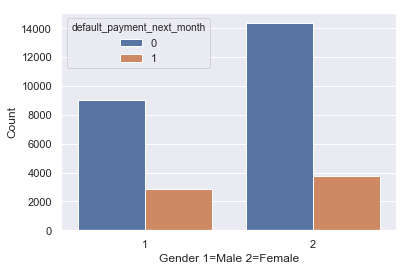

In [132]:
_ = sns.countplot(x='SEX', data=df,hue="default_payment_next_month")
_ = plt.xlabel('Gender 1=Male 2=Female')
_ = plt.ylabel('Count')
#Female = 1 Male = 2

Takeaway: More females (#2) are receiving loans than males. However, men seem to be defaulting at a higher rate. 

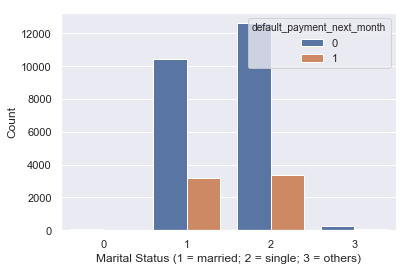

In [14]:
_= sns.countplot(x='MARRIAGE', data=df,hue="default_payment_next_month")
_= plt.xlabel('Marital Status (1 = married; 2 = single; 3 = others)')
_= plt.ylabel('Count')
# Marital status (1 = married; 2 = single; 3 = others)

In [ ]:
Takeaway: Married couples #1 are defaulting at a slightly higher rate than singles

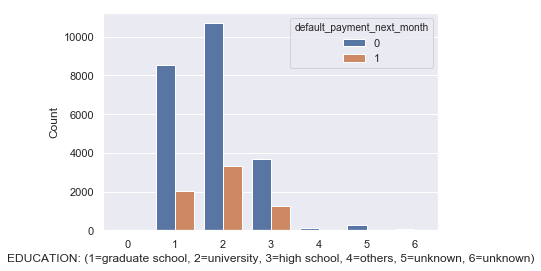

In [16]:
_= sns.countplot(x='EDUCATION', data=df,hue="default_payment_next_month")
_= plt.xlabel('EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')
_= plt.ylabel('Count')
#Pretty even rates of default based on education

In [ ]:
Takeaway: At first glance, the rate of defaults seem pretty evenly spread out amoung various levels of education. 

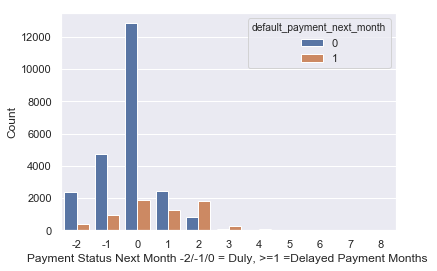

In [19]:
_= sns.countplot(x='PAY_1', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

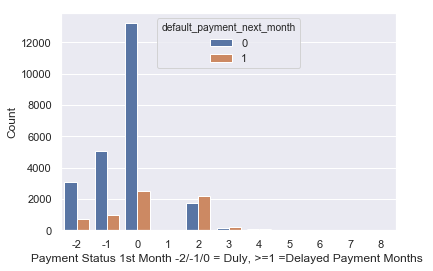

In [20]:
_= sns.countplot(x='PAY_2', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

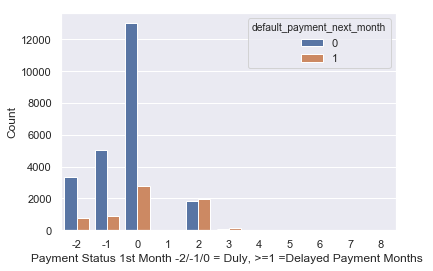

In [21]:
_= sns.countplot(x='PAY_3', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
# More delay = more likely to default

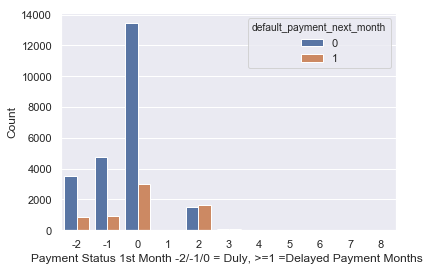

In [22]:
_= sns.countplot(x='PAY_4', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
# More delay = more likely to default

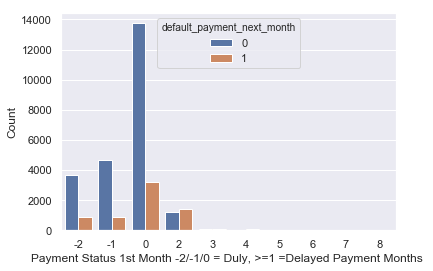

In [23]:
_= sns.countplot(x='PAY_5', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

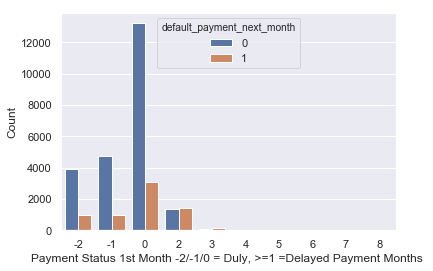

In [24]:
_= sns.countplot(x='PAY_6', data=df,hue="default_payment_next_month")
_= plt.xlabel('Payment Status 1st Month -2/-1/0 = Duly, >=1 =Delayed Payment Months ')
_= plt.ylabel('Count')
#More delay = more likely to default

Takeaway: Unsurprisingly, delayed payments lead to higher default rates. 

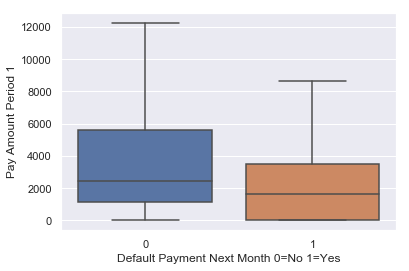

In [26]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT1', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 1')


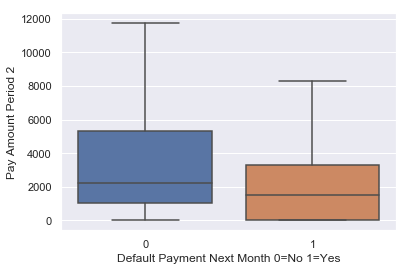

In [27]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT2', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 2')


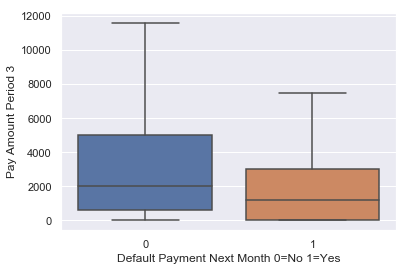

In [28]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT3', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 3')


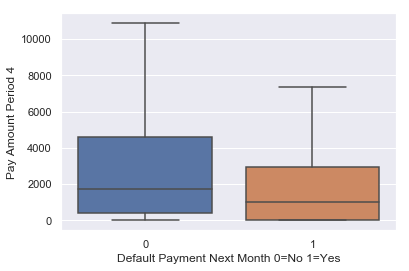

In [29]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT4', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 4')


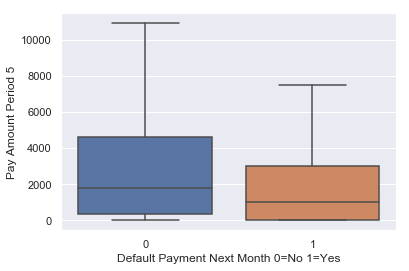

In [30]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT5', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 5')


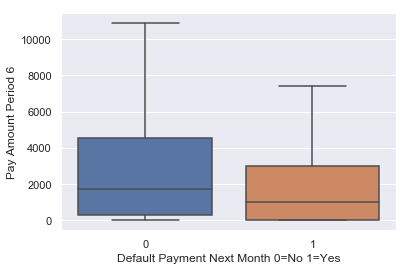

In [31]:
_= sns.boxplot(x='default_payment_next_month', y='PAY_AMT6', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Pay Amount Period 6')


Takeaway: Smaller payments tend to default more. This makes sense for two reasons. 1. We already saw that lower balance loans tend to default at higher rates. 2. Less Payments should equal higher rate of defaults. 

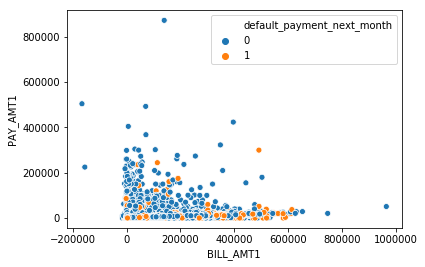

In [40]:
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', data=df, hue='default_payment_next_month')

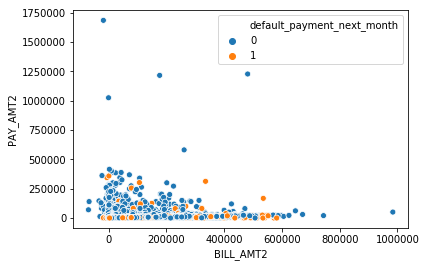

In [34]:
sns.scatterplot(x='BILL_AMT2', y='PAY_AMT2', data=df, hue='default_payment_next_month')

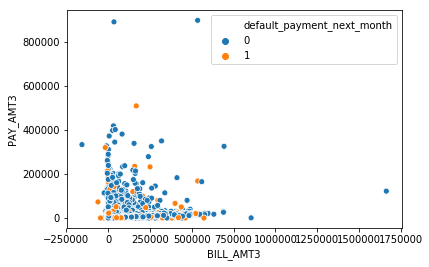

In [35]:
sns.scatterplot(x='BILL_AMT3', y='PAY_AMT3', data=df, hue='default_payment_next_month')

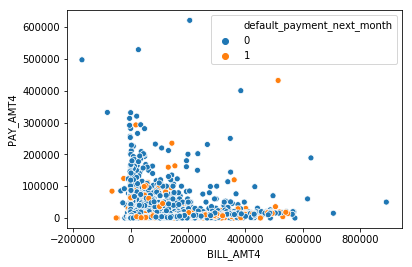

In [36]:
sns.scatterplot(x='BILL_AMT4', y='PAY_AMT4', data=df, hue='default_payment_next_month')

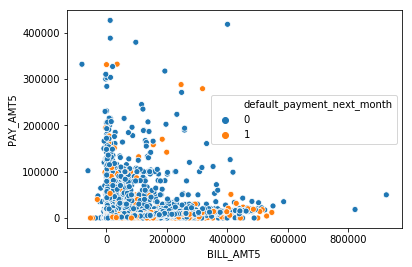

In [37]:
sns.scatterplot(x='BILL_AMT5', y='PAY_AMT5', data=df, hue='default_payment_next_month')

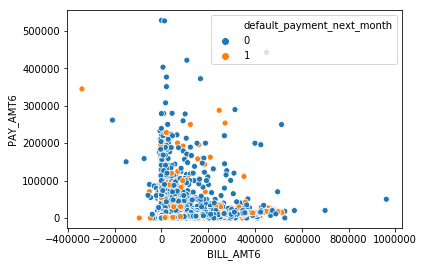

In [38]:
sns.scatterplot(x='BILL_AMT6', y='PAY_AMT6', data=df, hue='default_payment_next_month')

Takeaway: As the time-periods rise, so does the amount of defaults when a large payment is made. Can we pinpoint overextended loans earlier to allow for modifications?

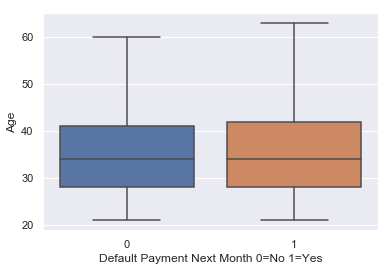

In [32]:
_= sns.boxplot(x='default_payment_next_month', y='AGE', data=df, showfliers=False)
_= plt.xlabel('Default Payment Next Month 0=No 1=Yes')
_= plt.ylabel('Age')

Takeaway: Age is a not a significnt factor in default rate. 

Main EDA Takeaways: A closer inspection of lower balance loans needs to be done. Are we handing out too many lower end loand to people who can not handle them?

Statistical Analysis on Default Loans

In [36]:
#Create Two Data Sets (Default and Non Default)
df_default = df[df.default_payment_next_month == 1]
df_nondefault = df[df.default_payment_next_month == 0]

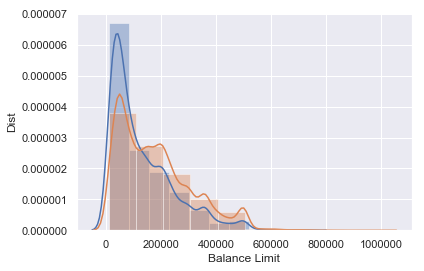

In [48]:
_=sns.distplot(df_default['LIMIT_BAL'],kde=True,bins=10)
_=sns.distplot(df_nondefault['LIMIT_BAL'],kde=True,bins=10)
_=plt.xlabel('Balance Limit')
_=plt.ylabel('Dist')


In [58]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

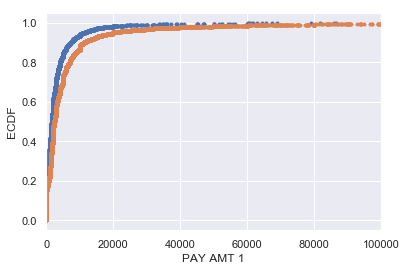

In [69]:
x_payamt1_default, y_payamt1_default = ecdf(df_default['PAY_AMT1'])
x_payamt1_nondefault, y_payamt1_nondefault = ecdf(df_nondefault['PAY_AMT1'])
_ = plt.plot(x_payamt1_default, y_payamt1_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt1_nondefault, y_payamt1_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 1')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

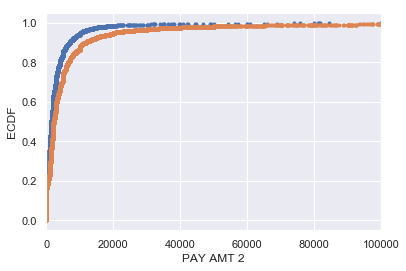

In [70]:
x_payamt2_default, y_payamt2_default = ecdf(df_default['PAY_AMT2'])
x_payamt2_nondefault, y_payamt2_nondefault = ecdf(df_nondefault['PAY_AMT2'])
_ = plt.plot(x_payamt2_default, y_payamt2_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt2_nondefault, y_payamt2_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 2')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

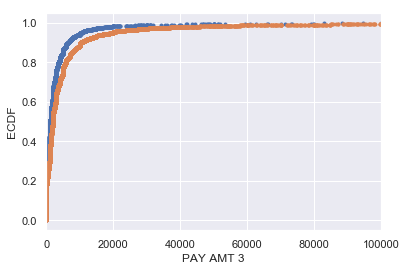

In [71]:
x_payamt3_default, y_payamt3_default = ecdf(df_default['PAY_AMT3'])
x_payamt3_nondefault, y_payamt3_nondefault = ecdf(df_nondefault['PAY_AMT3'])
_ = plt.plot(x_payamt3_default, y_payamt3_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt3_nondefault, y_payamt3_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 3')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

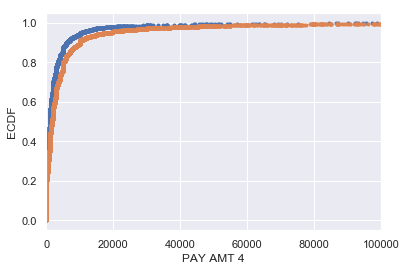

In [72]:
x_payamt4_default, y_payamt4_default = ecdf(df_default['PAY_AMT4'])
x_payamt4_nondefault, y_payamt4_nondefault = ecdf(df_nondefault['PAY_AMT4'])
_ = plt.plot(x_payamt4_default, y_payamt4_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt4_nondefault, y_payamt4_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 4')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

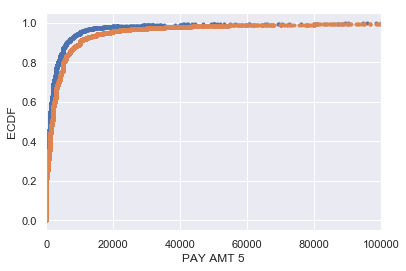

In [73]:
x_payamt5_default, y_payamt5_default = ecdf(df_default['PAY_AMT5'])
x_payamt5_nondefault, y_payamt5_nondefault = ecdf(df_nondefault['PAY_AMT5'])
_ = plt.plot(x_payamt5_default, y_payamt5_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt5_nondefault, y_payamt5_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 5')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

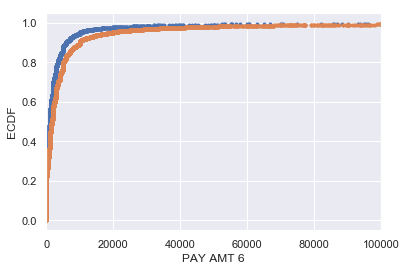

In [79]:
x_payamt6_default, y_payamt6_default = ecdf(df_default['PAY_AMT6'])
x_payamt6_nondefault, y_payamt6_nondefault = ecdf(df_nondefault['PAY_AMT6'])
_ = plt.plot(x_payamt6_default, y_payamt6_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_payamt6_nondefault, y_payamt6_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('PAY AMT 6')
_ = plt.xlim(right=100000, left=0)
_ = plt.ylabel('ECDF')
plt.show()

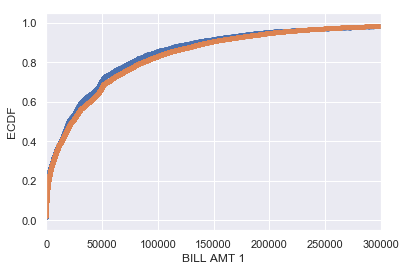

In [87]:
x_billamt1_default, y_billamt1_default = ecdf(df_default['BILL_AMT1'])
x_billamt1_nondefault, y_billamt1_nondefault = ecdf(df_nondefault['BILL_AMT1'])
_ = plt.plot(x_billamt1_default, y_billamt1_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt1_nondefault, y_billamt1_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 1')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

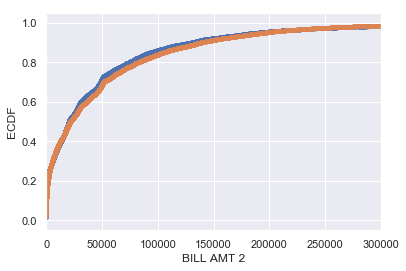

In [90]:
x_billamt2_default, y_billamt2_default = ecdf(df_default['BILL_AMT2'])
x_billamt2_nondefault, y_billamt2_nondefault = ecdf(df_nondefault['BILL_AMT2'])
_ = plt.plot(x_billamt2_default, y_billamt2_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt2_nondefault, y_billamt2_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 2')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

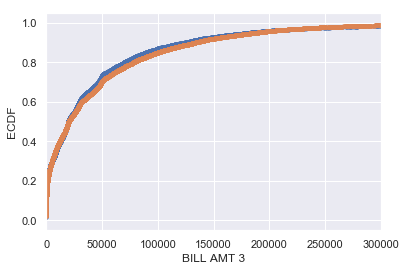

In [91]:
x_billamt3_default, y_billamt3_default = ecdf(df_default['BILL_AMT3'])
x_billamt3_nondefault, y_billamt3_nondefault = ecdf(df_nondefault['BILL_AMT3'])
_ = plt.plot(x_billamt3_default, y_billamt3_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt3_nondefault, y_billamt3_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 3')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

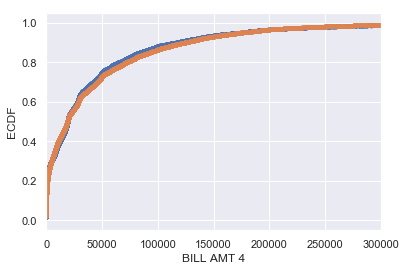

In [92]:
x_billamt4_default, y_billamt4_default = ecdf(df_default['BILL_AMT4'])
x_billamt4_nondefault, y_billamt4_nondefault = ecdf(df_nondefault['BILL_AMT4'])
_ = plt.plot(x_billamt4_default, y_billamt4_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt4_nondefault, y_billamt4_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 4')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

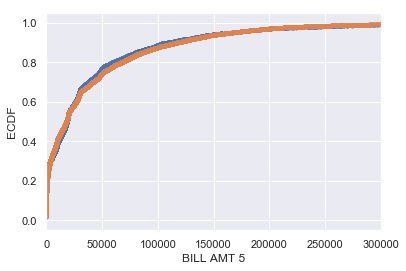

In [93]:
x_billamt5_default, y_billamt5_default = ecdf(df_default['BILL_AMT5'])
x_billamt5_nondefault, y_billamt5_nondefault = ecdf(df_nondefault['BILL_AMT5'])
_ = plt.plot(x_billamt5_default, y_billamt5_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt5_nondefault, y_billamt5_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 5')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

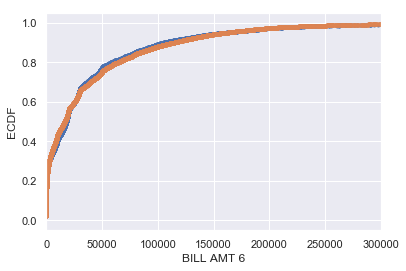

In [88]:
x_billamt6_default, y_billamt6_default = ecdf(df_default['BILL_AMT6'])
x_billamt6_nondefault, y_billamt6_nondefault = ecdf(df_nondefault['BILL_AMT6'])
_ = plt.plot(x_billamt6_default, y_billamt6_default, marker = '.', linestyle = 'none')
_ = plt.plot(x_billamt6_nondefault, y_billamt6_nondefault, marker = '.', linestyle = 'none')
_ = plt.xlabel('BILL AMT 6')
_ = plt.xlim(left=0, right=300000)
_ = plt.ylabel('ECDF')
plt.show()

In [94]:
corr = df.corr()

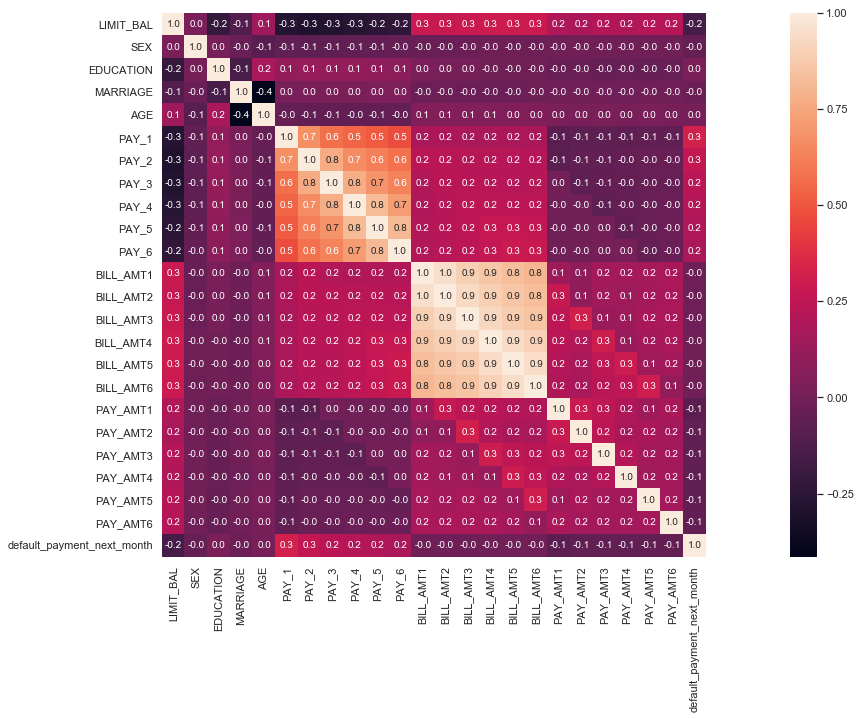

In [98]:
plt.subplots(figsize=(30,10))
sns.heatmap(corr, square=True, annot=True, fmt=".1f")


In [131]:
focus_cols = ['default_payment_next_month']
df.corr().filter(focus_cols).drop(focus_cols).sort_values(by=['default_payment_next_month'], ascending=False)

,default_payment_next_month
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
EDUCATION,0.028006
AGE,0.013890
BILL_AMT6,-0.005372
BILL_AMT5,-0.006760


Payment Status looks to be the Number 1 predictor of default, starting with the first period. Is this bank giving too much money to people who can't even repay the first payment?